<a href="https://colab.research.google.com/github/ALexTommy1223/Mayhoc/blob/main/Supermarketstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Đề Tài : Supermarket store branches sales analysis**

Store ID: (Index) ID of the particular store.

Store_Area: Physical Area of the store in yard square.

Items_Available: Number of different items available in the corresponding store.

Daily_Customer_Count: Number of customers who visited to stores on an average over month.

Store_Sales: Sales in (US $) that stores made.

*Import Libary*

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/ML'

Mounted at /content/drive
/content/drive/MyDrive/ML


In [26]:
#code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [3]:
df=pd.read_csv('Stores.csv')
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [5]:
df.columns 

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [6]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


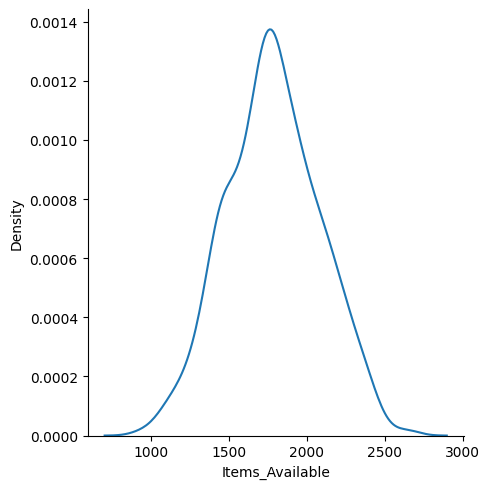

In [7]:
sns.displot(df['Items_Available'],kind='kde')

<Axes: xlabel='Store_Area', ylabel='Items_Available'>

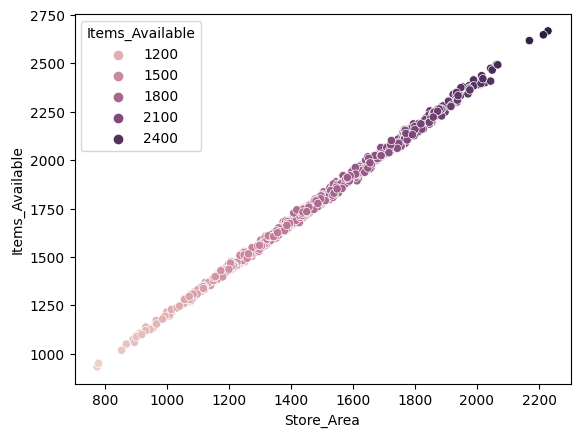

In [8]:
sns.scatterplot(x="Store_Area",y="Items_Available",
                data=df,hue="Items_Available")

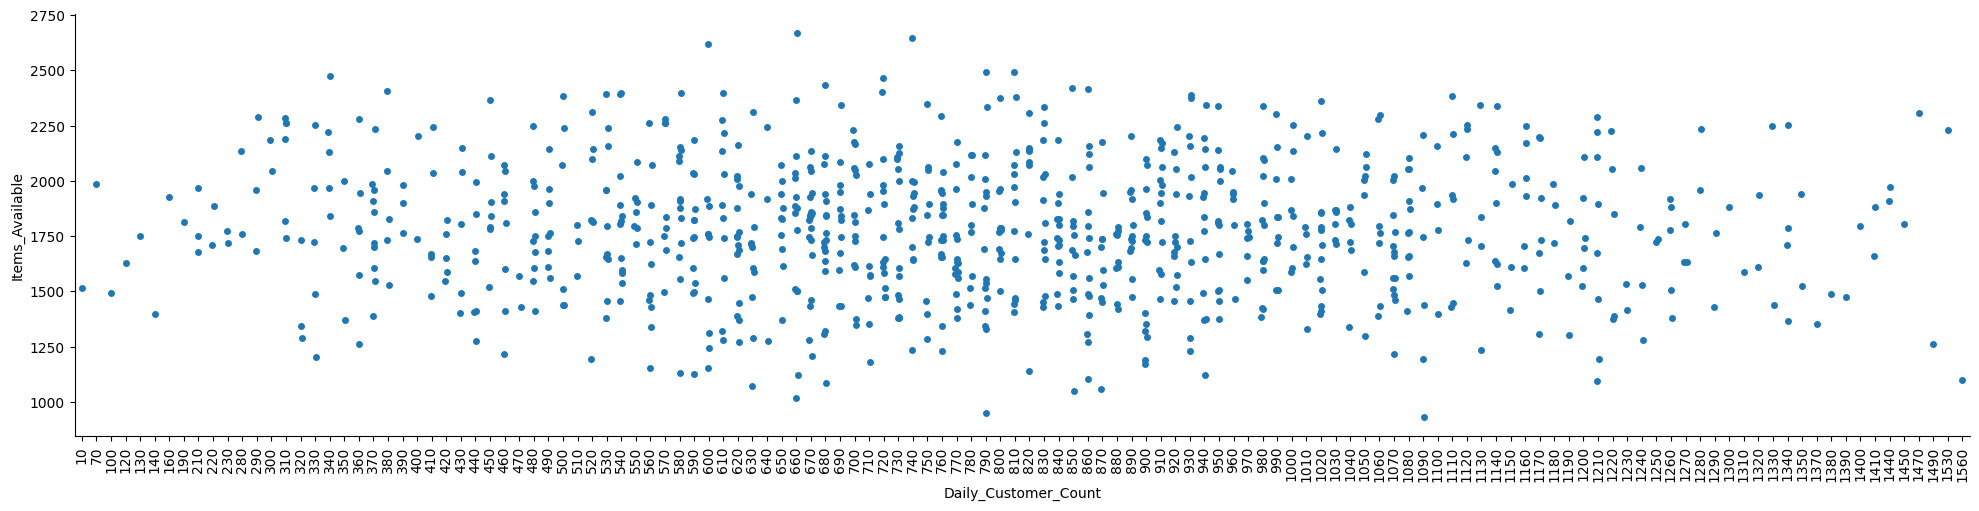

In [9]:
df = df.sort_values(by = "Daily_Customer_Count")
sns.catplot(x = "Daily_Customer_Count",y = "Items_Available", data = df, aspect =4)
plt.xticks(rotation =90)
plt.show()

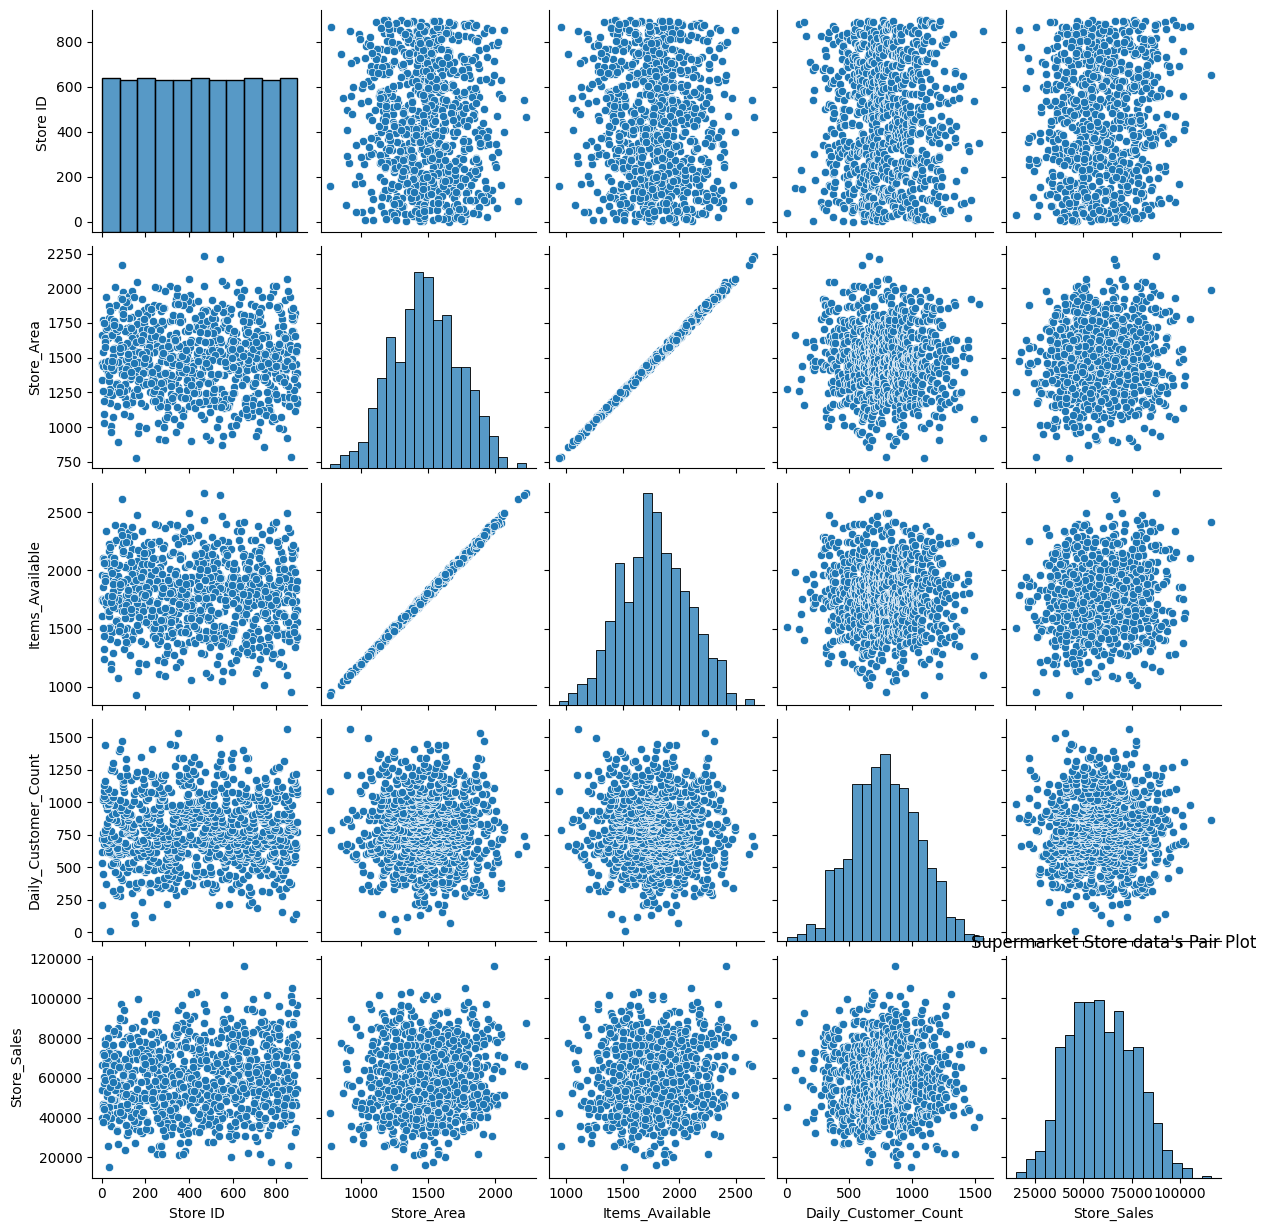

In [10]:
sns.pairplot(df)
plt.title("Supermarket Store data's Pair Plot")
plt.show()

Text(0.5, 1.0, 'Sales correlation')

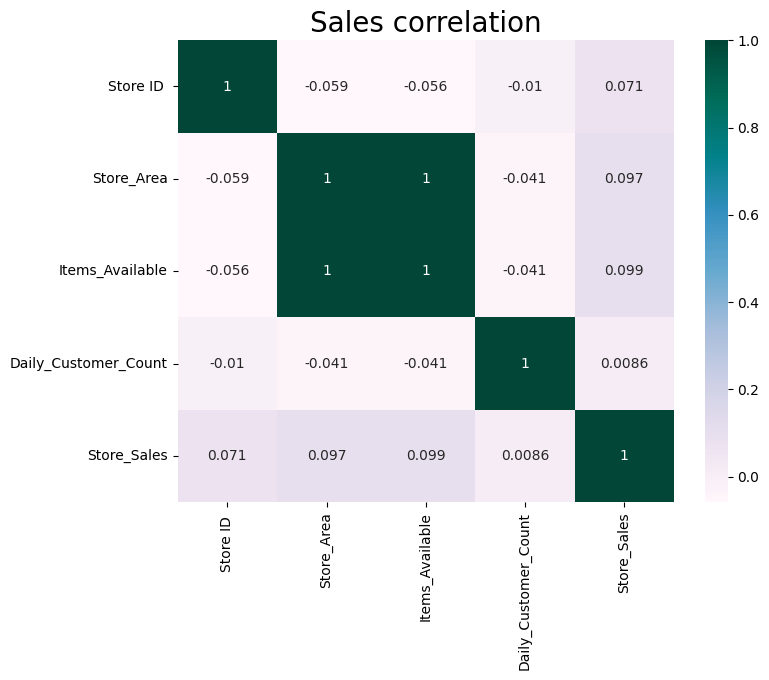

In [11]:
plt.figure(figsize=(8,6))
hm=sns.heatmap(df.corr(),cmap="PuBuGn",annot=True)
hm.set_title('Sales correlation', fontdict={'fontsize':20})

**Thuật toán Nerual Network**

> Dự đoán Doanh số cửa hàng



Sử dụng phân lớp 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
X = df[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
y = df['Store_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = MLPRegressor(max_iter=100000,random_state=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = model.score(X_test_scaled, y_test)
print("Accuracy on Test Set:", accuracy)


Accuracy on Test Set: -0.011299990275215777


Dạ nhóm em thấy phân lớp không được em chuyển sang hồi quy ạ

In [23]:
df1=df.copy()

Thuật Toán Nerual Network

In [24]:
X = df1[['Store_Area', 'Items_Available', 'Daily_Customer_Count']].values
y = df1['Store_Sales'].values.reshape(-1, 1)
# X = df1[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
# y = df1['Store_Sales']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(3,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile 
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)
loss = model.evaluate(X_test, y_test, verbose=0)
print("Mean Squared Error on Test Set:", loss)
predictions = model.predict(X_test)

Epoch 1/25
23/23 [==============================] - 1s 2ms/step - loss: 0.0579
Epoch 2/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0346
Epoch 3/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0331
Epoch 4/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 5/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0319
Epoch 6/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0312
Epoch 7/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 8/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0304
Epoch 9/25
23/23 [==============================] - 0s 3ms/step - loss: 0.0306
Epoch 10/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 11/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0296
Epoch 12/25
23/23 [==============================] - 0s 2ms/step - loss: 0.0297
Epoch 13/25
23/23 [==============================

Thuật toán SVM

In [27]:
from sklearn.svm import SVR
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=0)
model = SVR(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = np.sqrt(svr_mse)
svr_mae = mean_absolute_error(y_test, y_pred)


print("Mean Squared Error:", svr_mse)
print("Root Mean Squared Error:", svr_rmse)
print("Mean Absolute Error:", svr_mae)


Mean Squared Error: 0.026853183594197007
Root Mean Squared Error: 0.16386941018444232
Mean Absolute Error: 0.13603312555081779


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Thuật toán DecisionTree

In [28]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

dt_mse = mean_squared_error(y_test, y_pred)
dt_rmse = np.sqrt(dt_mse)
dt_mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", dt_mse)
print("Root Mean Squared Error:", dt_rmse)
print("Mean Absolute Error:", dt_mae)

Mean Squared Error: 0.05271050774582104
Root Mean Squared Error: 0.22958769075414526
Mean Absolute Error: 0.1868507560815253


In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rd_mse = mean_squared_error(y_test, y_pred)
rd_rmse = np.sqrt(rd_mse)
rd_mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", rd_mse)
print("Root Mean Squared Error:", rd_rmse)
print("Mean Absolute Error:", rd_mae)


<ipython-input-29-7e46c2fb4275>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 0.032152737652878335
Root Mean Squared Error: 0.17931184470881542
Mean Absolute Error: 0.14529100920447074


In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = np.sqrt(lr_mse)
lr_mae = mean_absolute_error(y_test, y_pred)
print("Mean Squared Error:", lr_mse)
print("Root Mean Squared Error:", lr_rmse)
print("Mean Absolute Error:", lr_mae)

Mean Squared Error: 0.027009262766774147
Root Mean Squared Error: 0.16434495053628556
Mean Absolute Error: 0.13657424385394062


In [19]:
from prettytable import PrettyTable
pt = PrettyTable(['', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error'])
 
svm=('SVM', svr_mse,  svr_rmse, svr_mae)
dt=('Decision Tree', dt_mse, dt_rmse, svr_mae)
rf=('Random Forest', rd_mse, rd_rmse, rd_mae)
lr=('LinearRegression', lr_mse, lr_rmse, lr_mae)
pt.add_row(svm)
pt.add_row(dt)
pt.add_row(rf)
pt.add_row(lr)
pt.float_format = ".4"
print(pt)


+------------------+--------------------+-------------------------+---------------------+
|                  | Mean Squared Error | Root Mean Squared Error | Mean Absolute Error |
+------------------+--------------------+-------------------------+---------------------+
|       SVM        |       0.0269       |          0.1639         |        0.1360       |
|  Decision Tree   |       0.0527       |          0.2296         |        0.1360       |
|  Random Forest   |       0.0322       |          0.1793         |        0.1453       |
| LinearRegression |       0.0270       |          0.1643         |        0.1366       |
+------------------+--------------------+-------------------------+---------------------+


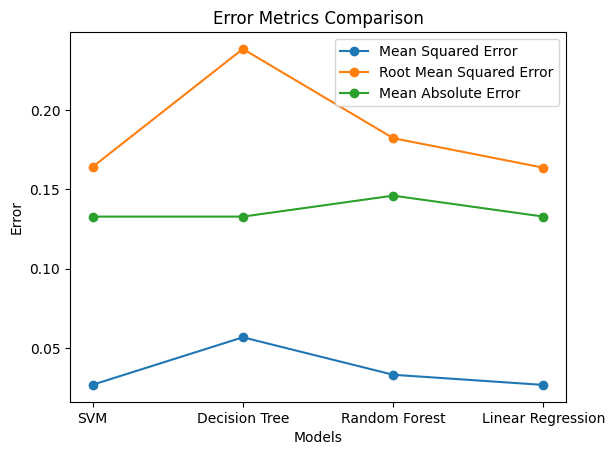

In [20]:
import matplotlib.pyplot as plt
models = ['SVM', 'Decision Tree', 'Random Forest', 'Linear Regression']
mse = [0.0269, 0.0568, 0.0332, 0.0268]
rmse = [0.1641, 0.2384, 0.1822, 0.1636]
mae = [0.1328, 0.1328, 0.1460, 0.1328]
plt.plot(models, mse, marker='o', label='Mean Squared Error')
plt.plot(models, rmse, marker='o', label='Root Mean Squared Error')
plt.plot(models, mae, marker='o', label='Mean Absolute Error')
plt.xlabel('Models')
plt.ylabel('Error')
plt.title('Error Metrics Comparison')
plt.legend()
plt.show()

